## Week 6 practice
# Sage Madden
# 10/28/2021

In [20]:
# Import libraries
import pandas as pd
from dplython import (DplyFrame, X, diamonds, select, sift,
  sample_n, sample_frac, head, arrange, mutate, group_by,
  summarize, DelayFunction)
import numpy as np
import plotnine as p9
# Plotnine is ggplot in python

In [24]:
# Read in data
surveys = DplyFrame(pd.read_csv("../data/portal_data_joined.csv"))
surveys_narm = surveys >> sift(X.weight.notna())

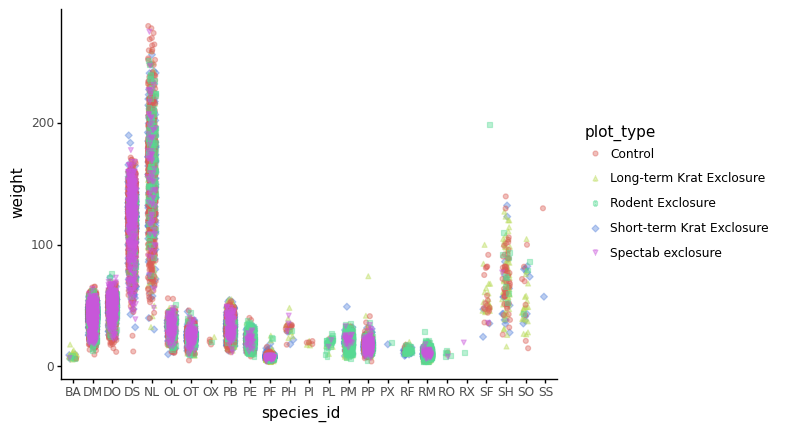

<ggplot: (-9223371960118038604)>

In [35]:
# Create scatter plot of weight (y) and species ID (x) colored by plot type
(p9.ggplot(data = surveys_narm,
           mapping = p9.aes(y = "weight", x = "species_id", color = "plot_type", shape = "plot_type"))
 + p9.geom_jitter(alpha = 0.4, width = 0.2)
 + p9.theme_classic()
)

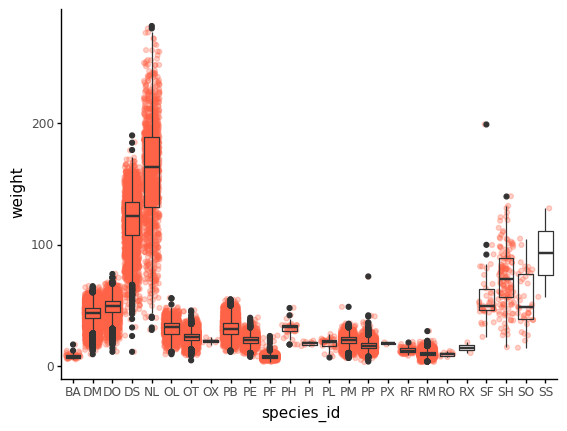

<ggplot: (-9223371960116043484)>

In [41]:
# Create boxplot
(p9.ggplot(data = surveys_narm,
           mapping = p9.aes(y = "weight", x = "species_id"))
 + p9.geom_jitter(alpha = 0.3, color = "tomato")
 + p9.geom_boxplot(alpha = 0)
 + p9.theme_classic()
)

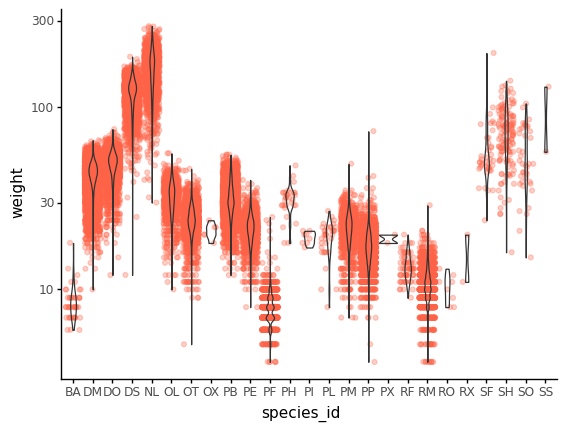

<ggplot: (-9223371960123813644)>

In [43]:
# Violin plot instead
(p9.ggplot(data = surveys_narm,
           mapping = p9.aes(y = "weight", x = "species_id"))
 + p9.geom_jitter(alpha = 0.3, color = "tomato")
 + p9.geom_violin(alpha = 0)
 + p9.scale_y_log10()
 + p9.theme_classic()
)

<bound method NDFrame.head of        record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
11           845      5    6  1978        2         NL   M             32.0   
13          1164      8    5  1978        2         NL   M             34.0   
14          1261      9    4  1978        2         NL   M             32.0   
17          1756      4   29  1979        2         NL   M             33.0   
18          1818      5   30  1979        2         NL   M             32.0   
...          ...    ...  ...   ...      ...        ...  ..              ...   
34065      14999     10    9  1988        7         NL   F             34.0   
34066      15127     11    6  1988        7         NL   M             33.0   
34067      15147     11    6  1988        7         NL   M             32.0   
34068      15159     11    6  1988        7         NL   F             33.0   
34083        196      9   12  1977        7         PF   F             15.0   

       weight        

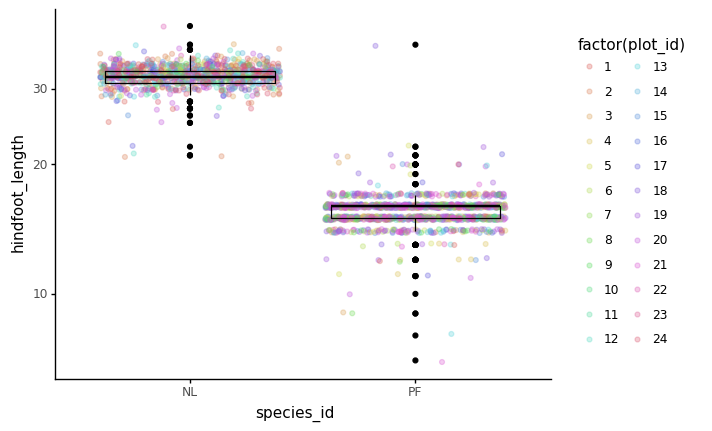

<ggplot: (-9223371960129550400)>

In [57]:
hindfoot_subset = surveys_narm >> sift((X.species_id == "NL") | (X.species_id == "PF")) >> sift(X.hindfoot_length.notna())
print(hindfoot_subset.head)

(p9.ggplot(data = hindfoot_subset,
           mapping = p9.aes(y = "hindfoot_length", x = "species_id", color = "factor(plot_id)"))
 + p9.geom_jitter(alpha = 0.3)
 + p9.geom_boxplot(alpha = 0, color = "black")
 + p9.scale_y_log10()
 + p9.theme_classic()
)
